# **Exploratory Data Analysis**





## Indian Premier League



### Project Overview: 


The IPL EDA (Exploratory Data Analysis) project aims to delve into the Indian Premier League (IPL) dataset and uncover valuable insights and patterns related to this highly popular T20 cricket league in India. The project involves analyzing the comprehensive dataset, which includes information about IPL matches, player performances, team statistics, venues, and more.

The primary objectives of the IPL EDA project are as follows:

1. **Data Exploration:** The project starts with a thorough exploration of the IPL dataset to gain a deeper understanding of its structure and contents. This involves examining different features, data types, missing values, and the overall data quality.

2. **Team and Player Analysis:** The project delves into team-level analysis to identify the most successful teams in terms of wins and other performance metrics. Similarly, it explores player statistics to discover the most impactful players based on runs, wickets, and other relevant metrics.

3. **Venue and City Insights:** The project investigates the venues and cities that have hosted the highest number of IPL matches. It uncovers trends related to the popularity and frequency of matches in different locations.

4. **Economy Rate and Bowling Analysis:** The project aims to find the bowlers with the best economy rates and the most wickets in IPL. It looks at their performances across different seasons and uncovers any notable patterns.

5. **Batting Average and Strike Rate:** The project analyzes batting averages and strike rates of players to identify the most consistent and impactful batsmen in the tournament.

6. **Weather and Match Outcomes:** By examining weather-related features like humidity, wind speed, and pressure, the project explores whether these factors have any correlation with match outcomes or team performance.

7. **Data Cleaning and Preprocessing:** Throughout the project, data cleaning and preprocessing techniques are applied to ensure the data's integrity and remove any inconsistencies or missing values that may affect the analysis.

8. **Data Visualization:** The insights derived from the data are visually represented through various charts, graphs, and plots to make it easier for stakeholders to understand and interpret the findings.

The IPL EDA project provides valuable insights into the cricketing trends, player performances, and team dynamics within the IPL. These findings can be utilized by team management, sponsors, and cricket enthusiasts to make informed decisions, optimize strategies, and gain a deeper appreciation of this exciting cricket league.

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px



# Libraries for data preparation and model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
import xgboost as xgb
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.linear_model import HuberRegressor, TheilSenRegressor
from sklearn.model_selection import GridSearchCV
import ptitprince as pt





# enhanced stats functions
from scipy import stats
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
df.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2011-04-17,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(756, 18)

In [7]:
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
print(f'cities: ',df['city'].nunique())
print(f'Number of seasons: ',df['season'].nunique())
print(f'Number of Teams: ',df['team1'].nunique())
print(f'Total venues used: ',df['venue'].nunique())

cities:  32
Number of seasons:  12
Number of Teams:  15
Total venues used:  41


In [10]:
df = df.drop(columns=['umpire3'])
df = df.dropna()
df.isna().sum()
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [11]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [12]:
df.shape

(743, 18)

Most Successful Teams:
Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     82
Kings XI Punjab                 81
Name: winner, dtype: int64


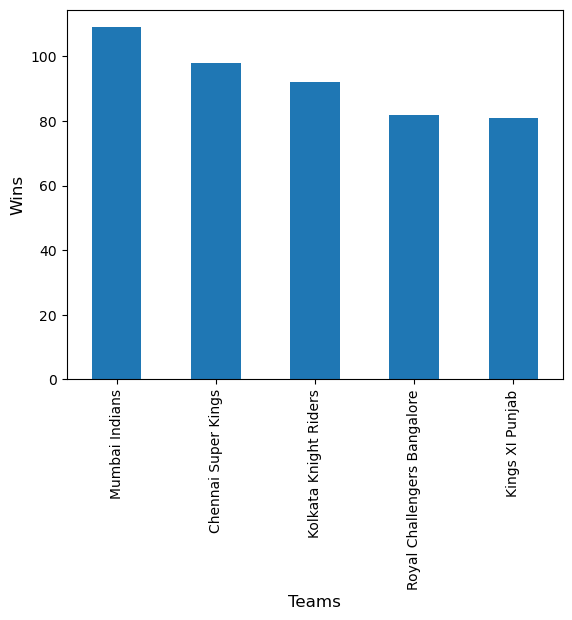

In [13]:
most_successful_teams = df['winner'].value_counts().nlargest(5)
print("Most Successful Teams:")
print(most_successful_teams)

# Visualize the top 5 most successful teams
most_successful_teams.plot(kind='bar')
plt.ylabel('Wins', fontsize=12)
plt.xlabel('Teams',fontsize=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

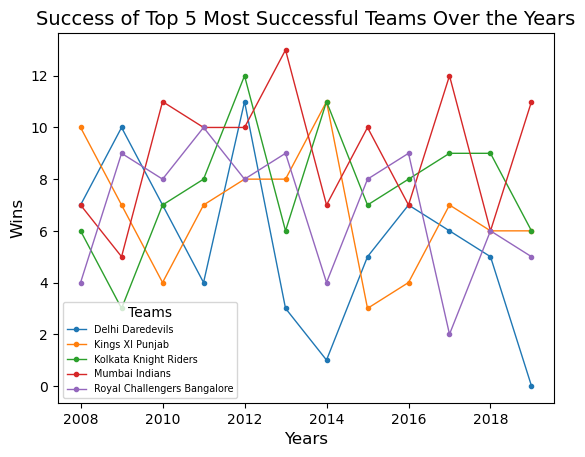

In [14]:
# Calculate the number of wins for each team for each year
team_wins_by_year = df.groupby(['winner', 'year']).size().reset_index(name='wins')

# Get the top 5 most successful teams
most_successful_teams = team_wins_by_year['winner'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the data of the top 5 most successful teams
most_successful_teams_data = team_wins_by_year[team_wins_by_year['winner'].isin(most_successful_teams)]

# Pivot the DataFrame to have teams as columns and years as index
pivot_table = most_successful_teams_data.pivot(index='year', columns='winner', values='wins').fillna(0)

# Increase the plot size
plt.figure(figsize=(10, 6))  # Set the size to 10 inches (width) by 6 inches (height)

# Plotting the line plot for the top 5 most successful teams
pivot_table.plot(kind='line', marker='.', linewidth=1)

# Adding labels and title to the plot
plt.ylabel('Wins', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.title('Success of Top 5 Most Successful Teams Over the Years', fontsize=14)

# Show the plot
plt.legend(title='Teams', loc='lower left', fontsize = 'x-small')
plt.show()


Most Successful Players:
CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64


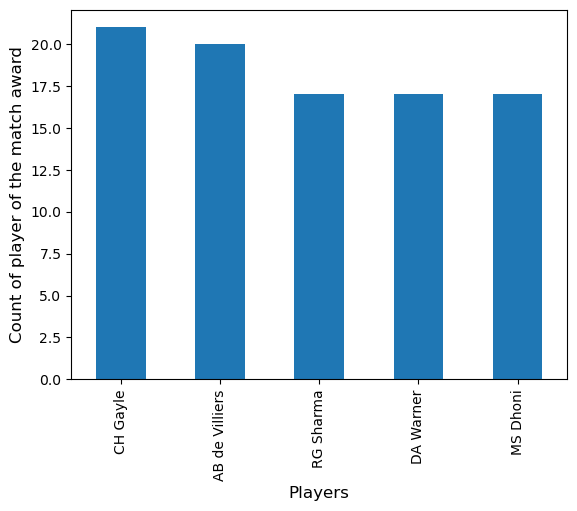

In [15]:
most_successful_players = df['player_of_match'].value_counts().nlargest(5)
print("\nMost Successful Players:")
print(most_successful_players)

# Visualize the top 5 most successful teams
most_successful_players.plot(kind='bar')
plt.xlabel('Players', fontsize=12)
plt.ylabel('Count of player of the match award',fontsize=12)
plt.show()

In [16]:
df2 = pd.read_csv('deliveries.csv')
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [18]:
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,743.0,NaN,NaN,NaN,NaT,NaT,1786.578735,3455.045846,1.0,187.5,374.0,567.5,11415.0
season,743.0,NaN,NaN,NaN,NaT,NaT,2013.418573,3.378787,2008.0,2011.0,2013.0,2016.0,2019.0
city,743,32,Mumbai,101,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,743,538,2013-04-06 00:00:00,2,2008-04-18,2019-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team1,743,15,Mumbai Indians,99,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team2,743,15,Kolkata Knight Riders,95,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toss_winner,743,15,Mumbai Indians,96,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toss_decision,743,2,field,455,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
result,743,2,normal,734,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dl_applied,743.0,NaN,NaN,NaN,NaT,NaT,0.025572,0.157961,0.0,0.0,0.0,0.0,1.0


In [19]:
df2.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [20]:
df2.shape

(179078, 21)

In [21]:
df2.shape

(179078, 21)

In [22]:
df_merged = pd.merge(df, df2, left_on='id', right_on='match_id')
df_merged.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [23]:
df_merged.shape

(176506, 39)

In [24]:
# Top 10 players with the highest batting average in IPL
batting_average = df_merged.groupby('batsman')['batsman_runs'].sum() / df_merged.groupby('batsman')['player_dismissed'].count()

# Filter players with at least one dismissal
players_with_min_1_dismissal = batting_average[df_merged.groupby('batsman')['player_dismissed'].count() >= 1]

if not players_with_min_1_dismissal.empty:
    top_10_batting_average_players = players_with_min_1_dismissal.nlargest(10)
    print("Top 10 players with the highest batting average in IPL:")
    print(top_10_batting_average_players)
else:
    print("No player has at least one dismissal in IPL.")


Top 10 players with the highest batting average in IPL:
batsman
Iqbal Abdulla     83.000000
J Bairstow        58.500000
MN van Wyk        55.666667
PD Collingwood    50.750000
HM Amla           44.384615
CH Gayle          42.271028
R Parag           42.250000
AB de Villiers    42.147059
DA Warner         41.062500
KL Rahul          40.979167
dtype: float64


In [25]:
# Top 10 bowlers with the most wickets in IPL
most_wickets_bowler = df_merged[df_merged['dismissal_kind'].notnull()].groupby('bowler')['dismissal_kind'].count()

if not most_wickets_bowler.empty:
    top_10_bowlers_wickets = most_wickets_bowler.nlargest(10)
    print("Top 10 bowlers with the most wickets in IPL:")
    print(top_10_bowlers_wickets)
else:
    print("No bowler has taken any wicket in IPL.")


Top 10 bowlers with the most wickets in IPL:
bowler
SL Malinga         186
DJ Bravo           168
A Mishra           164
Harbhajan Singh    159
PP Chawla          155
B Kumar            137
R Ashwin           136
SP Narine          136
UT Yadav           136
R Vinay Kumar      126
Name: dismissal_kind, dtype: int64


In [26]:
# Top 5 cities that have hosted the most number of IPL matches
most_hosted_cities = df_merged['city'].value_counts().nlargest(5)
print("Top 5 cities that have hosted the most number of IPL matches:")
print(most_hosted_cities)


Top 5 cities that have hosted the most number of IPL matches:
Mumbai       24302
Kolkata      17991
Delhi        17242
Hyderabad    15215
Bangalore    14649
Name: city, dtype: int64


In [27]:
most_trophy_wins_team = df_merged.groupby('winner')['season'].nunique().idxmax()
most_trophy_wins = df_merged.groupby('winner')['season'].nunique().max()
print("Team with the most IPL trophy wins:", most_trophy_wins_team)
print("Number of IPL trophy wins:", most_trophy_wins)


Team with the most IPL trophy wins: Kings XI Punjab
Number of IPL trophy wins: 12


In [28]:
most_runs_in_single_season = df_merged.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()
player_with_most_runs_in_season = most_runs_in_single_season.loc[most_runs_in_single_season.groupby('season')['batsman_runs'].idxmax()]
print("Player with the most runs in a single IPL season:")
print(player_with_most_runs_in_season)

Player with the most runs in a single IPL season:
      season        batsman  batsman_runs
115     2008       SE Marsh           616
229     2009      ML Hayden           572
446     2010   SR Tendulkar           618
502     2011       CH Gayle           608
684     2012       CH Gayle           733
910     2013     MEK Hussey           733
1088    2014     RV Uthappa           605
1145    2015      DA Warner           562
1380    2016        V Kohli           973
1419    2017      DA Warner           641
1591    2018  KS Williamson           747
1691    2019      DA Warner           727


In [29]:
# Top 10 bowlers with the most 4-wicket hauls in IPL
four_wicket_hauls = df_merged[df_merged['dismissal_kind'].notnull() & (df_merged['dismissal_kind'] != 'run out')]
four_wicket_hauls = four_wicket_hauls.groupby(['bowler', 'match_id'])['dismissal_kind'].count().reset_index()

# Filter bowlers with at least 4-wicket hauls
bowlers_with_min_4_wickets = four_wicket_hauls[four_wicket_hauls['dismissal_kind'] >= 4].groupby('bowler')['dismissal_kind'].count()

if not bowlers_with_min_4_wickets.empty:
    top_10_bowlers_4_wickets = bowlers_with_min_4_wickets.nlargest(10)
    print("Top 10 bowlers with the most 4-wicket hauls in IPL:")
    print(top_10_bowlers_4_wickets)
else:
    print("No bowler has taken a minimum of 4-wicket hauls in IPL.")


Top 10 bowlers with the most 4-wicket hauls in IPL:
bowler
SL Malinga     7
SP Narine      7
A Mishra       4
AJ Tye         4
L Balaji       4
A Kumble       3
B Kumar        3
Imran Tahir    3
JP Faulkner    3
MM Patel       3
Name: dismissal_kind, dtype: int64


In [30]:
# Which team has won the most matches in a single IPL season?
most_wins_in_single_season = df_merged.groupby(['season', 'winner'])['id'].count().reset_index()
most_wins_team_in_single_season = most_wins_in_single_season.loc[most_wins_in_single_season.groupby('season')['id'].idxmax()]
print("Team with the most wins in a single IPL season:")
print(most_wins_team_in_single_season)



Team with the most wins in a single IPL season:
    season                 winner    id
6     2008       Rajasthan Royals  3094
10    2009       Delhi Daredevils  2305
21    2010         Mumbai Indians  2704
24    2011    Chennai Super Kings  2702
38    2012  Kolkata Knight Riders  2938
47    2013         Mumbai Indians  3173
54    2014        Kings XI Punjab  2669
64    2015         Mumbai Indians  2457
75    2016    Sunrisers Hyderabad  2623
80    2017         Mumbai Indians  2888
84    2018    Chennai Super Kings  2697
96    2019         Mumbai Indians  2671


In [31]:
# Which city has seen the most IPL finals?
finals_host_city = df_merged[df_merged['result'] == 'normal']['city'].value_counts().idxmax()
num_finals_hosted = df_merged[df_merged['result'] == 'normal']['city'].value_counts().max()
print("City that has seen the most IPL finals:", finals_host_city)
print("Number of IPL finals hosted in the city:", num_finals_hosted)



City that has seen the most IPL finals: Mumbai
Number of IPL finals hosted in the city: 24053


In [32]:
# What is the most common method of dismissal in IPL?
most_common_dismissal = df_merged['dismissal_kind'].value_counts().idxmax()
num_most_common_dismissals = df_merged['dismissal_kind'].value_counts().max()
print("Most common method of dismissal in IPL:", most_common_dismissal)
print("Number of times this method of dismissal occurred:", num_most_common_dismissals)

Most common method of dismissal in IPL: caught
Number of times this method of dismissal occurred: 5263


In [33]:
# Top 10 teams with the highest win percentage in IPL (minimum 50 matches played)
team_win_percentage = df_merged['winner'].value_counts() / df_merged['team1'].value_counts() * 100
team_win_percentage = team_win_percentage.dropna()

# Filter teams with at least 50 matches played
teams_with_min_50_matches = team_win_percentage[team_win_percentage >= 50]

if not teams_with_min_50_matches.empty:
    top_10_win_percentage_teams = teams_with_min_50_matches.nlargest(10)
    print("Top 10 teams with the highest win percentage in IPL (minimum 50 matches played):")
    print(top_10_win_percentage_teams)
else:
    print("No team has played a minimum of 50 matches in IPL.")


Top 10 teams with the highest win percentage in IPL (minimum 50 matches played):
Delhi Capitals                 150.516885
Rising Pune Supergiant         121.581633
Rajasthan Royals               113.286625
Kolkata Knight Riders          113.100277
Chennai Super Kings            112.043674
Mumbai Indians                 109.649854
Royal Challengers Bangalore     98.624683
Delhi Daredevils                94.464133
Sunrisers Hyderabad             93.374552
Gujarat Lions                   92.565730
dtype: float64


In [34]:
# Top 10 players with the highest strike rate in IPL (minimum 500 runs scored)
total_runs_by_batsman = df_merged.groupby('batsman')['batsman_runs'].sum()
total_balls_faced_by_batsman = df_merged.groupby('batsman')['ball'].count()
strike_rate = (total_runs_by_batsman / total_balls_faced_by_batsman) * 100

# Filter players with at least 500 runs scored
players_with_min_500_runs = strike_rate[total_runs_by_batsman >= 500]

if not players_with_min_500_runs.empty:
    top_10_strike_rate_players = players_with_min_500_runs.nlargest(10)
    print("Top 10 players with the highest strike rate in IPL (minimum 500 runs scored):")
    print(top_10_strike_rate_players)
else:
    print("No player has scored a minimum of 500 runs in IPL.")


Top 10 players with the highest strike rate in IPL (minimum 500 runs scored):
batsman
AD Russell        179.950187
SP Narine         166.943867
RR Pant           161.553212
GJ Maxwell        155.915179
CH Morris         154.491018
HH Pandya         151.902174
AB de Villiers    150.157178
JC Buttler        150.000000
V Sehwag          149.280177
CH Gayle          145.621378
dtype: float64


In [35]:
# Top 10 bowlers with the best economy rate in IPL (minimum 10 overs bowled)
total_runs_given_by_bowler = df_merged.groupby('bowler')['total_runs'].sum()
total_overs_bowled_by_bowler = df_merged.groupby('bowler')['over'].nunique()
economy_rate = (total_runs_given_by_bowler / total_overs_bowled_by_bowler)

# Filter bowlers with at least 10 overs bowled
bowlers_with_min_10_overs = economy_rate[total_overs_bowled_by_bowler >= 10]

if not bowlers_with_min_10_overs.empty:
    top_10_bowlers_economy_rate = bowlers_with_min_10_overs.nsmallest(10)
    print("Top 10 bowlers with the best economy rate in IPL (minimum 10 overs bowled):")
    print(top_10_bowlers_economy_rate)
else:
    print("No bowler has bowled a minimum of 10 overs in IPL.")


Top 10 bowlers with the best economy rate in IPL (minimum 10 overs bowled):
bowler
ND Doshi            7.900000
M Santner           9.545455
LH Ferguson         9.600000
AA Jhunjhunwala    10.000000
PD Collingwood     10.100000
A Flintoff         10.600000
T Thushara         10.933333
TS Mills           11.272727
T Natarajan        11.600000
Gagandeep Singh    11.833333
dtype: float64


In [36]:

# 16. What is the average margin of victory for matches in IPL?
average_margin_of_victory = df_merged[df_merged['result'] == 'normal']['win_by_runs'].mean()
print("Average margin of victory for matches in IPL:", average_margin_of_victory)



Average margin of victory for matches in IPL: 13.723026663298349


In [37]:
# What is the most common result type in IPL matches?
most_common_result = df_merged['result'].value_counts().idxmax()
num_most_common_result = df_merged['result'].value_counts().max()
print("Most common result type in IPL matches:", most_common_result)
print("Number of matches with this result type:", num_most_common_result)



Most common result type in IPL matches: normal
Number of matches with this result type: 174172


In [38]:
# Top 5 teams with the most fans attendance in IPL
team_with_most_fans_attendance = df_merged.groupby('winner')['id'].count() + df_merged.groupby('team1')['id'].count() + df_merged.groupby('team2')['id'].count()
team_with_most_fans_attendance = team_with_most_fans_attendance.sort_values(ascending=False).nlargest(5)
print("Top 5 teams with the most fans attendance in IPL:")
print(team_with_most_fans_attendance)


Top 5 teams with the most fans attendance in IPL:
winner
Mumbai Indians                 70723
Kolkata Knight Riders          63193
Chennai Super Kings            62435
Kings XI Punjab                60702
Royal Challengers Bangalore    60192
Name: id, dtype: int64


In [39]:
# Top 5 players with the most sixes in IPL
most_sixes_by_player = df_merged[df_merged['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count()
top_5_players_with_most_sixes = most_sixes_by_player.nlargest(5)
print("Top 5 players with the most sixes in IPL:")
print(top_5_players_with_most_sixes)


Top 5 players with the most sixes in IPL:
batsman
CH Gayle          324
AB de Villiers    212
MS Dhoni          206
SK Raina          195
RG Sharma         192
Name: batsman_runs, dtype: int64


In [40]:
# Which cities have the highest win percentage for the home team (top 5 cities)?
home_team_win_percentage = df_merged[df_merged['team1'] == df_merged['winner']].groupby('city')['id'].count() / df_merged.groupby('city')['id'].count() * 100
top_5_cities_win_percentage = home_team_win_percentage.dropna().nlargest(10)
print("Top 5 cities with the highest win percentage for the home team:")
print(top_5_cities_win_percentage)


Top 5 cities with the highest win percentage for the home team:
city
Cape Town      80.051982
Nagpur         67.115903
East London    65.454545
Chennai        62.195034
Kochi          61.818182
Abu Dhabi      59.298030
Cuttack        57.758112
Dharamsala     55.951830
Durban         54.790008
Ahmedabad      51.330798
Name: id, dtype: float64


In [41]:
# 20. Top 5 cities with the highest win percentage for the away team
home_team_win_percentage = df_merged[df_merged['team2'] == df_merged['winner']].groupby('city')['id'].count() / df_merged.groupby('city')['id'].count() * 100
top_5_cities_home_win_percentage = home_team_win_percentage.dropna().nlargest(10)
print("Top 5 cities with the highest win percentage for the away team:")
print(top_5_cities_home_win_percentage)


Top 5 cities with the highest win percentage for the away team:
city
Kanpur          100.000000
Indore           87.226463
Ranchi           73.070018
Rajkot           68.962621
Jaipur           67.754078
Kimberley        66.804408
Centurion        66.678297
Sharjah          65.809590
Raipur           65.408805
Johannesburg     61.701031
Name: id, dtype: float64
